In [20]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Exercise 1 Summarise graphically DelayedFlights.csv dataset

In [21]:
df1 = pd.read_csv(r'C:\Users\jmane\Documents\Data analysis\DelayedFlights.csv', delimiter=',') #Read df
df1.dataframeName = 'DelayedFlights.csv' 

In [22]:
pd.options.display.max_columns = None # No limit of columns to be able to see all of them
df1.head(3) # Quick view of colums and rows


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [23]:
df1.tail(3)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1936757,7009727,2008,12,13,6,1110.0,1103,1413.0,1418,DL,1641,N908DL,123.0,135.0,104.0,-5.0,7.0,SAT,ATL,874,8.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [24]:
df1[df1.columns[0:4]]=df1[df1.columns[0:4]].astype(object) # Transform to categorical data to safe memory
df1[df1.columns[8:10]]=df1[df1.columns[8:10]].astype(object)
df1[df1.columns[21:24]]=df1[df1.columns[21:24]].astype(object)


## 1.1 A categorical variable

In [25]:
car=df1['UniqueCarrier'].value_counts()  # Get one categorical variable

In [26]:
car2=car.index.get_level_values(0).tolist() # Get index

In [27]:
car3=car.values.tolist() # Get a list

### Treemap

In [62]:
pip install squarify #Install Quarify to be able to plot 

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#Install'


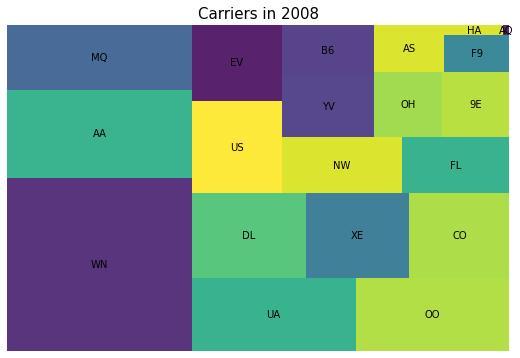

In [74]:

import squarify    #Import algorithm for treemap


plt.figure(figsize =(9, 6))
fig1=squarify.plot(sizes=car3, label=car2, alpha=.9 )
plt.axis("off")
plt.title("Carriers in 2008",fontsize = 15)
plt.savefig("fig 1 Treemap.png")
plt.show()

'WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines'

We can detect visally that WN: Southwest Airlines has the biggest share of the market, followed by AA: American Airlines and MQ: American Eagle Airlines.

### Lollipop plot

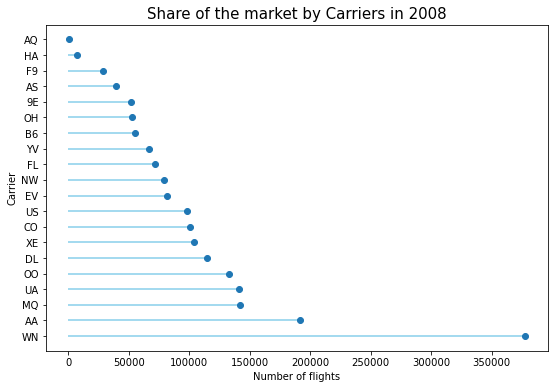

In [75]:
# Reorder it based on the values
ordered_df = car.sort_values(ascending=False)
my_range=range(1,len(car.index)+1)

plt.figure(figsize =(9, 6))
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df, color='skyblue')
plt.plot(ordered_df, my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, car2)
plt.title("Share of the market by Carriers in 2008", loc='center',fontsize = 15)
plt.xlabel('Number of flights')
plt.ylabel('Carrier')

# Save fig
plt.savefig("fig 2 Lollipop.png")
# Show the plot
plt.show()

'WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines'

We can also see in this Lollipop the share of the market by carrier and the number of flights. WN: Southwest Airlines has two times the share of the market of the second biggest company, AA: American Airlines.

### Pie chart

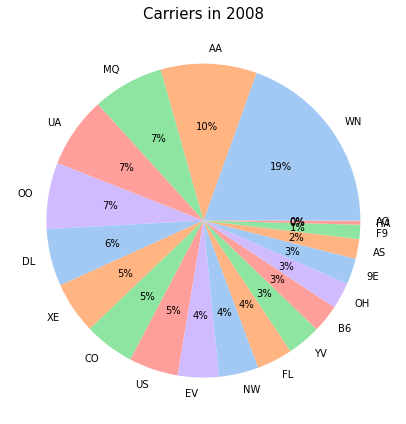

In [76]:
colors = sns.color_palette('pastel')[0:5] # Define Seaborn color palette to use

# Create pie chart
plt.figure(figsize =(9, 6))
plt.pie(car3, labels = car2, colors = colors, autopct='%.0f%%')
plt.title("Carriers in 2008", loc='center',fontsize = 15)
plt.tight_layout()
plt.savefig("fig 3 Pie chart.png")
plt.show()


'WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines'

With the pie chart we get the percentage of the market share in short range flights. WN: Southwest Airlines has a market share of 19%.

## 1.2 A numerical variable

In [32]:
ret=df1[df1['ArrDelay'] >= 15] # Get the numerical variable equal or bigger than 15

A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).

In [33]:
ret2=ret['ArrDelay'].sort_values(ascending=False) # Sort and transform to frame.
ret3=ret2.to_frame().reset_index()
ret3.columns =['index', 'retard']

### ECDF plot (Plot empirical cumulative distribution functions)

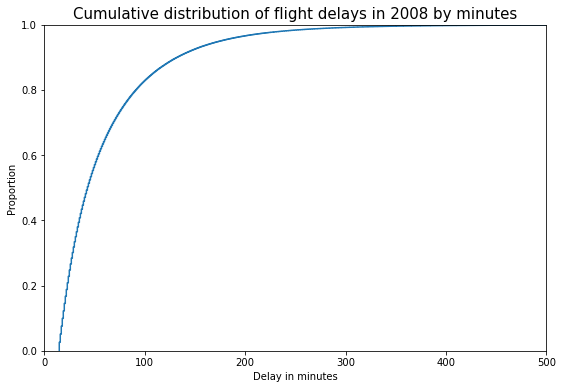

In [77]:
plt.figure(figsize =(9, 6))
plt.xlim(0, 500)
sns.ecdfplot(data=ret2)
plt.title("Cumulative distribution of flight delays in 2008 by minutes", loc='center',fontsize = 15)
plt.xlabel('Delay in minutes')
plt.savefig("fig 4 ECDE plot.png")
plt.show()

With this plot we can see that with dalays from 15 to 350 minutes aprox. we get almost the 100% of the parameters. The rest of flights with a delay of more thant 350 minutes are outliers.

### Box plot

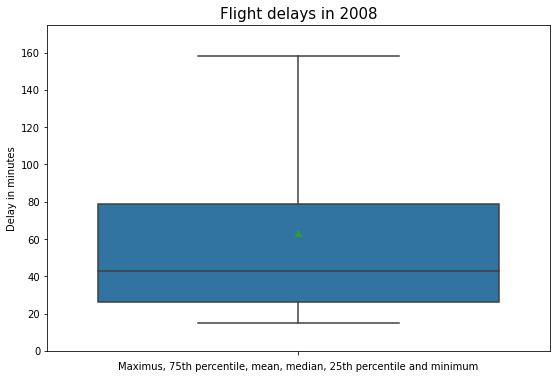

In [78]:
plt.figure(figsize =(9, 6))
sns.boxplot(y=ret3['retard'],showfliers=False, showmeans=True) # Outliers out and mean added
plt.ylim(0,175)
plt.title("Flight delays in 2008", loc='center',fontsize = 15)
plt.xlabel('Maximus, 75th percentile, mean, median, 25th percentile and minimum')
plt.ylabel('Delay in minutes')
plt.savefig("fig 5 Box plot.png")
plt.show()

Boxplots show five summary statistics, including median, derived from data to show distribution of numerical data corresponding categorical variables and I have included the mean. To show more cleanly the plot, if have supressed outliers, wich are more or less than 1.5 times the upper or lower quartiles. The statistics are: the lowest value (15 minutes), excluding outliers; the first quartile (this is the 25th percentile, or median of all the numbers below the median, 26 minutes); the median value (equivalent to the 50th percentile, 43 minutes); the third quartile (this is the 75th percentile, or median of all the numbers above the median, 79 minutes); the highest value, excluding outliers, 160 minutes aprox.; and the average, 63 minutes (green triangle).
The data set has a non-symetrical distribution that is positively skewed because the box plot show the median closer to the lower or bottom quartile, so the mean is bigger than the median and the "tail" of the distribution points to the righ.The kurtosis is negative because has lighter tails than the normal distribution.


In [36]:
ret['ArrDelay'].describe().apply("{0:.1f}".format) # Statistics to help the explanation.


count    1247488.0
mean          63.3
std           60.8
min           15.0
25%           26.0
50%           43.0
75%           79.0
max         2461.0
Name: ArrDelay, dtype: object

### Violin plot

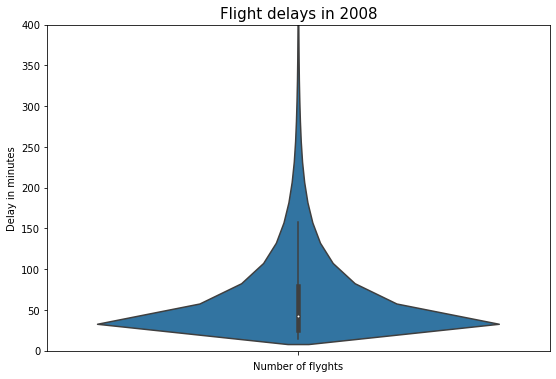

In [79]:
# plot
plt.figure(figsize =(9, 6))
sns.violinplot(y=ret3['retard'],showfliers=False) # Withou outliers
plt.ylim(0,400) ### Set limit to 400 flight.
plt.title("Flight delays in 2008", loc='center',fontsize = 15)
plt.xlabel('Number of flyghts')
plt.ylabel('Delay in minutes')
plt.savefig("fig 6 Violin plot.png")
plt.show()

A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data.The violin plot help us to visualise the distribution and probability of the set. We obtain a visual of the the values, the first quartile (25th percentile), the median, the third quartile (75th percentile) and the maximum and also the distribution of the data. 
The kernel density plot used for creating the violin plot is the same as the one added on top of the histogram. Wider sections of the violin plot represent a higher probability of observations taking a given value, the thinner sections correspond to a lower probability.
In this case, if our flight were delayed 15 or more minutes (less than 15 is not considered delayed) the highest probability is that the delay will be of about 45 minutes aprox. So delays are highly concentrated around the median.

### Histogram plot with kernel density estimates (KDEs)

<Figure size 648x432 with 0 Axes>

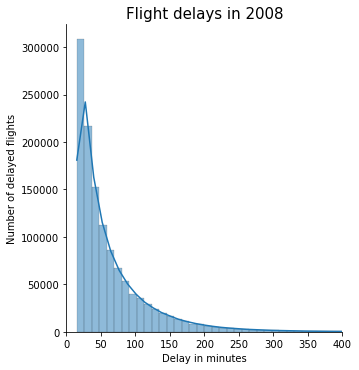

In [80]:
plt.figure(figsize =(9, 6))
sns.displot(ret['ArrDelay'], kde=True,bins=225)
plt.xlim(0, 400)
plt.title("Flight delays in 2008", loc='center',fontsize = 15)
plt.xlabel('Delay in minutes')
plt.ylabel('Number of delayed flights')
plt.savefig("fig 7 Histogram with kernel density estimates.png")
plt.show()

Another way to show distribution but with less information than violin plot.

## 1.3 A numerical and a categorical variable  (ArrDelay i UniqueCarrier)

In [39]:
ret_cat=df1[df1['ArrDelay'] >= 15]


### Box plot without outliers

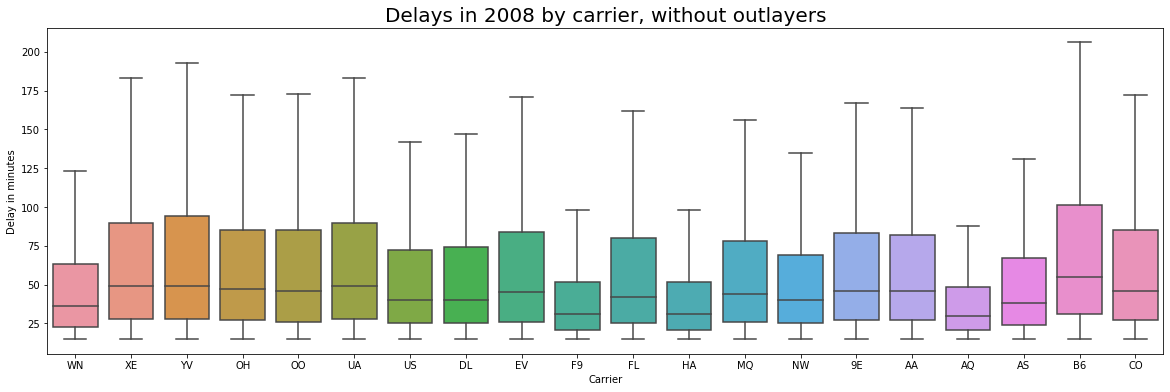

In [81]:
plt.figure(figsize =(20, 6))
sns.boxplot(y=ret_cat['ArrDelay'],x=ret_cat['UniqueCarrier'],showfliers=False)
plt.title("Delays in 2008 by carrier, without outlayers", loc='center',fontsize = 20)
plt.ylabel('Delay in minutes')
plt.xlabel('Carrier')
plt.savefig("fig 8 Box plot without outliers.png")
plt.show()

'WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines'

AQ: Aloha Airlines and F9: Frontier Airlines have the lowest median, average and maxim delays of all the carriers. B6: JetBlue Airways and YV: Mesa Airlines have the hightest median, average and maxim delays of all the carriers.

### Box plot with outliers

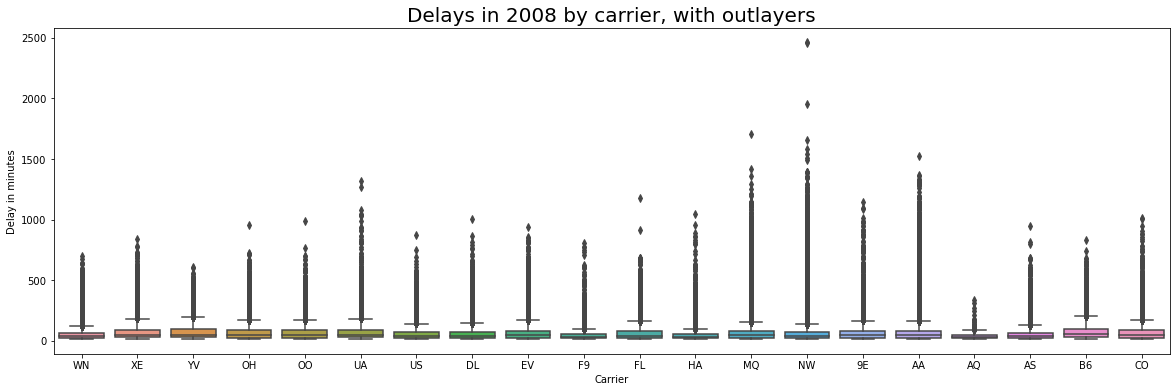

In [82]:
plt.figure(figsize =(20, 6))
sns.boxplot(x=ret_cat['UniqueCarrier'], y=ret_cat['ArrDelay'],data=ret_cat) 
plt.title("Delays in 2008 by carrier, with outlayers", loc='center',fontsize = 20)
plt.ylabel('Delay in minutes')
plt.xlabel('Carrier')
plt.savefig("fig 9 Box plot with outliers.png")
plt.show()

'WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines'

NW: Northwest Airlines and MQ: American Eagle Airlines have the most extreme outliers. Again AQ: Aloha Airlines and F9: Frontier Airlines have the lowest outliers. Prbably they are especialised in few destinations where they fly regularly.

### Violin plot 

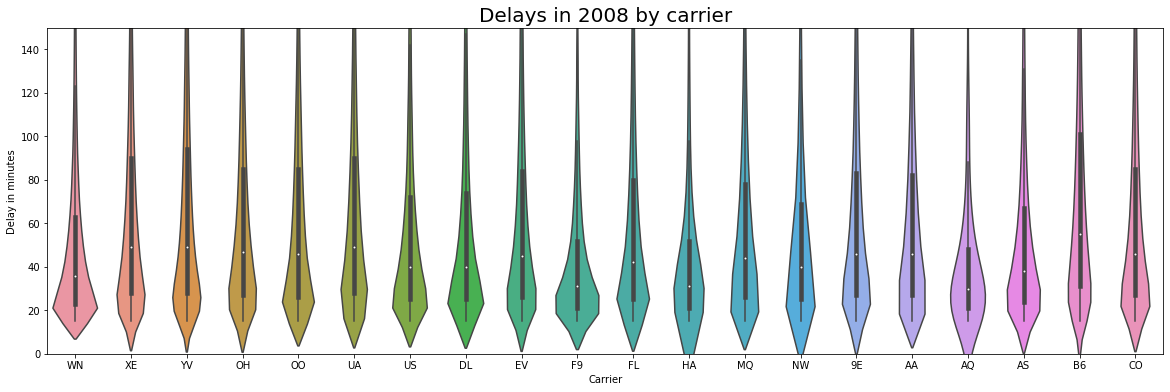

In [83]:
plt.figure(figsize =(20, 6))
plt.ylim(0,150)
sns.violinplot(y=ret_cat['ArrDelay'],x=ret_cat['UniqueCarrier'],showfliers=False)
plt.title("Delays in 2008 by carrier", loc='center',fontsize = 20)
plt.ylabel('Delay in minutes')
plt.xlabel('Carrier')
plt.savefig("fig 10 Violin plot with outliers.png")
plt.show()

'WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines'

We can also see in this plot the distribution and probability of the set. Wider sections of the violin plot represent a higher probability of observations taking a given value, the thinner sections correspond to a lower probability.

In [43]:
ret_cat_r=ret_cat.sample(n=200000) # Reduction of the sample to ease calculation without losing representativity.

### Histogram with a reduced random sample

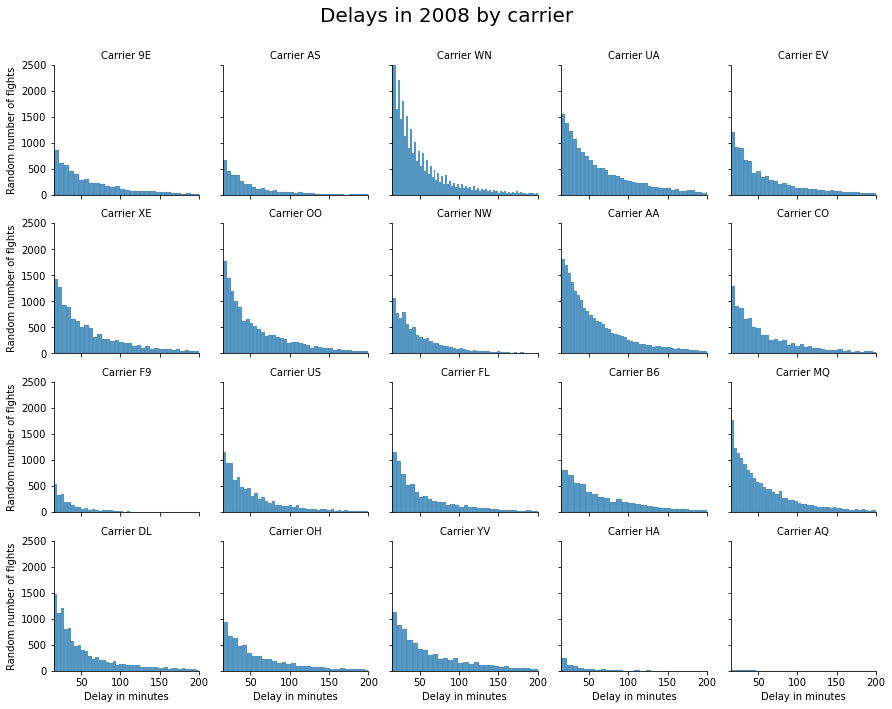

In [84]:

g = sns.FacetGrid(ret_cat_r, col='UniqueCarrier', height=2.5, col_wrap=5)
g.map(sns.histplot, 'ArrDelay')
g.set_axis_labels("Delay in minutes", "Random number of flghts")
g.set_titles(col_template="Carrier {col_name}", row_template="{row_name}")
g.set(xlim=(15,200), ylim=(0,2500))
g.tight_layout()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Delays in 2008 by carrier',fontsize=20)
plt.savefig("fig 11 Histogram by carrier.png")
plt.show()


'WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines'

To show more easely the distribution of delays by carrier I have reduced the dimension of the data set randomly. The sample is skewed to the left in all the carriers due to the nature of the data (delays should be the exception and not the rule) so, far from a normal distribution.

In [45]:
carr_del=ret["UniqueCarrier"].value_counts().reset_index() # Count number of flights by carrier

In [46]:
# Sorted mean of arrival delay by carrier
carr_del3=ret.groupby('UniqueCarrier')[['ArrDelay']].mean().reset_index().sort_values('ArrDelay', ascending=False) 

## 1.4 Two numerical variables (ArrDelay i DepDelay)

### Scatter Plot

In [47]:
ret_cat_r2=ret_cat.sample(n=10000) # Reducing de sample to ease speed of calculation without afecting representativity

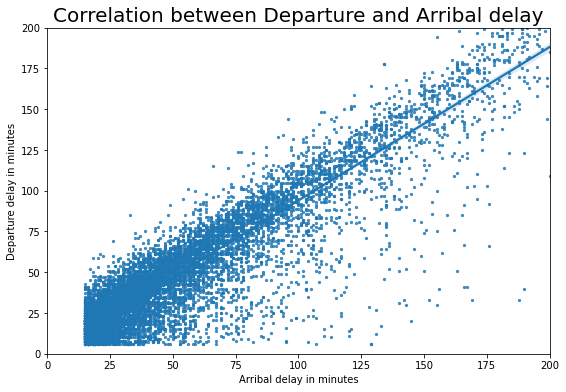

In [85]:
plt.figure(figsize =(9, 6))
h=sns.regplot(x=ret_cat_r2['ArrDelay'], y=ret_cat_r2['DepDelay'], scatter_kws={'s':5})
h.set(xlim=(0,200), ylim=(0,200))
plt.title('Correlation between Departure and Arribal delay',fontsize=20)
plt.xlabel("Arribal delay in minutes")
plt.ylabel("Departure delay in minutes")
plt.savefig("fig 12 Scatterplot with two variables.png")
plt.show()

There is a very hight correlation as arribal delays are mainly consequence of departure delay.

### Bivariate histogram

<Figure size 648x432 with 0 Axes>

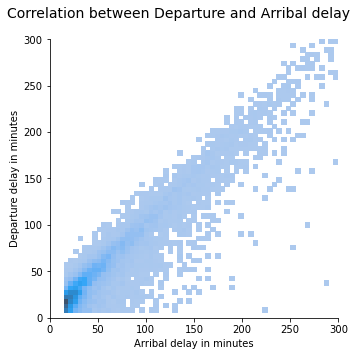

In [86]:
plt.figure(figsize =(9, 6))
i=sns.displot(ret_cat_r2, x="ArrDelay", y="DepDelay")
i.set(xlim=(0,300), ylim=(0,300))
i.fig.suptitle('Correlation between Departure and Arribal delay',fontsize=14)
plt.xlabel("Arribal delay in minutes")
plt.ylabel("Departure delay in minutes")
plt.tight_layout()
plt.savefig("fig 13 Bivariate histogram.png")
plt.show()

A bivariate histogram bins the data within rectangles that tile the plot and then shows the count of observations within each rectangle with the fill color. The color shows were the correlation in stronger.

### Bivariate KDE plot 2D Gaussian

<Figure size 648x432 with 0 Axes>

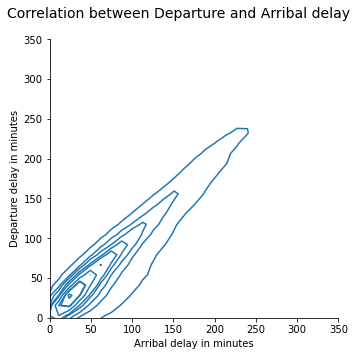

In [87]:
plt.figure(figsize =(9, 6))
i=sns.displot(ret_cat_r2, x="ArrDelay", y="DepDelay", kind="kde")
i.set(xlim=(0,350), ylim=(0,350))
i.fig.suptitle('Correlation between Departure and Arribal delay',fontsize=14)
plt.xlabel("Arribal delay in minutes")
plt.ylabel("Departure delay in minutes")
plt.tight_layout()
plt.savefig("fig 14 Bivariate KDE plot 2D Gaussian.png")
plt.show()

The Gaussian 2d shows were the correlation in stronger.

### Plotting joint and marginal distributions

<Figure size 648x432 with 0 Axes>

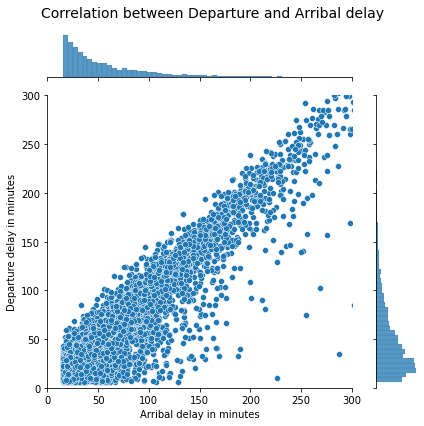

In [88]:
plt.figure(figsize =(9, 6))
j=sns.jointplot(data=ret_cat_r2,x="ArrDelay", y="DepDelay")
j.ax_marg_x.set_xlim(0, 300)
j.ax_marg_y.set_ylim(0, 300)
j.set_axis_labels("Arribal delay in minutes", "Departure delay in minutes")
j.fig.suptitle('Correlation between Departure and Arribal delay',fontsize=14)
plt.tight_layout()
plt.savefig("fig 15 Plotting joint and marginal distributions.png")
plt.show()

Helps us to observe joint and marginal distributions.

## 1.5 Three variables (ArrDelay, DepDelay and UniqueCarrier)

### Histogram of three variables by carrier

Text(0.5, 0.98, 'Departure and Arribal delay by carrier')

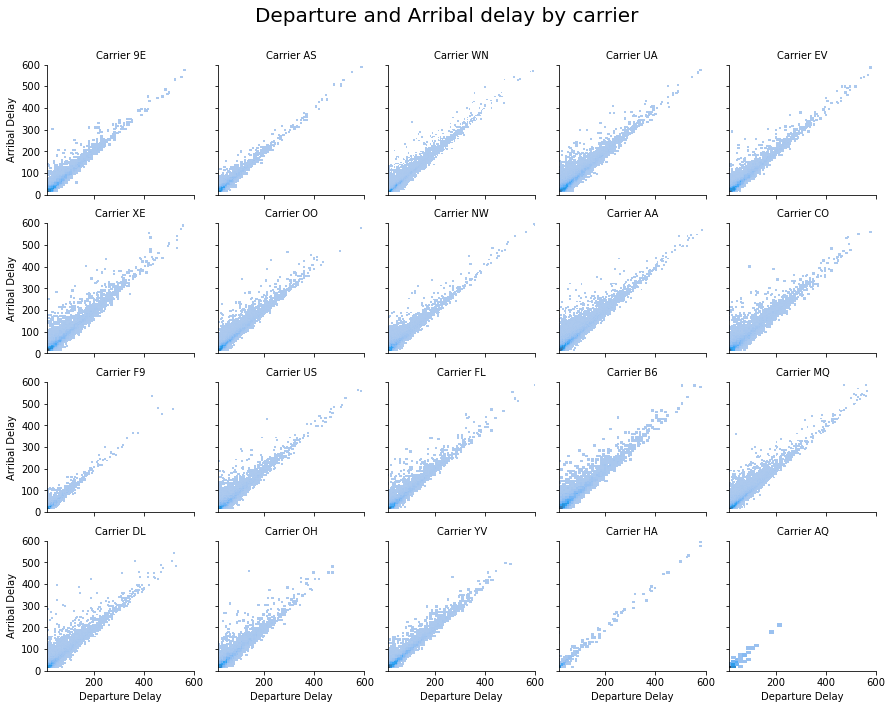

In [52]:
g = sns.FacetGrid(ret_cat_r, col='UniqueCarrier', height=2.5, col_wrap=5)
g.map(sns.histplot, 'DepDelay','ArrDelay')
g.set_axis_labels("Departure Delay", "Arribal Delay")
g.set_titles(col_template="Carrier {col_name}", row_template="{row_name}")
g.set(xlim=(15,600), ylim=(0,600))
g.tight_layout()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Departure and Arribal delay by carrier',fontsize=20)
plt.savefig("fig 16 Histogram of three variables.png")
plt.show()


An histogram for each carrier. All show a similar correlation, but we can observe clearly the density of flights.

In [53]:
# Calculate the mean of arribal and departure delay.
carr_del4=ret.groupby('UniqueCarrier')[['ArrDelay','DepDelay']].mean().reset_index().sort_values('ArrDelay', ascending=False)


### Scatter plot of three variables by carrier

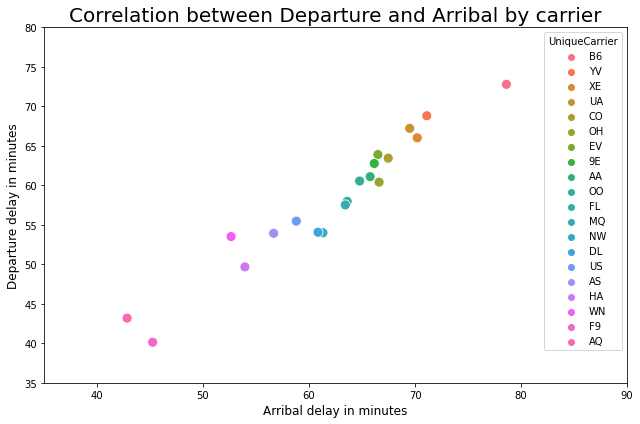

In [89]:
plt.figure(figsize =(9, 6))
ax=sns.scatterplot(data=carr_del4,x="ArrDelay", y="DepDelay", hue="UniqueCarrier", s=100)
ax.set(xlim=(35,90), ylim=(35,80))
plt.title('Correlation between Departure and Arribal by carrier',fontsize=20)
plt.xlabel("Arribal delay in minutes",fontsize=12)
plt.ylabel("Departure delay in minutes", fontsize=12)
plt.tight_layout()
plt.savefig("fig 17 Scatter plot of three variables by carrier.png")
plt.show()

'WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines'

Each carrier has diferent conditions (origen and destination, organisation, and so on) and these affect performance. The key variable is departure delays.

## 1.6 More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier)

### Heat correlation matrix

In [55]:
four_v = ret[['UniqueCarrier','DepDelay','ArrDelay','AirTime']] # To get the data
new_df = four_v.copy()

In [56]:
new_df_r= four_v[['DepDelay','ArrDelay','AirTime']].sample(n=10000) # Reduce sample
new_df_r2= four_v[['UniqueCarrier','DepDelay','ArrDelay','AirTime']].sample(n=10000) # Reduce sample

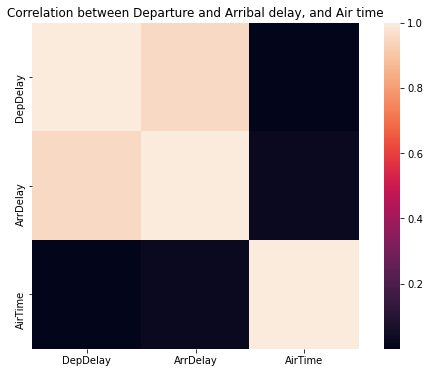

In [91]:
#correlation matrix
corrmat = new_df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=1, square=True,fmt='.1f');
plt.title('Correlation between Departure and Arribal delay, and Air time',fontsize=12)
plt.savefig("fig 18 Heat map correlation matrix.png")
plt.show()

There is no correlation between air time and delays. It depends on distance.

### Pair Grid sctatterplot

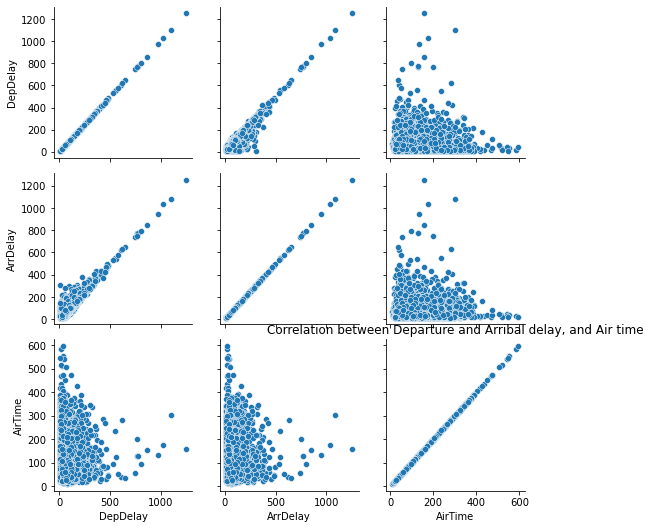

In [92]:
g = sns.PairGrid(new_df_r)
g.map(sns.scatterplot)
plt.title('Correlation between Departure and Arribal delay, and Air time',fontsize=12)
plt.savefig("fig 19 Pair Grid sctatterplot.png")
plt.show()

Clearly, we can see that there is a correltation between departure and arribal delay but no them if airtime.

### Boxplot of three variables

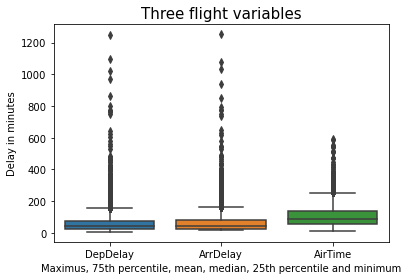

In [93]:
sns.boxplot(data=new_df_r)
plt.title("Three flight variables", loc='center',fontsize = 15)
plt.xlabel('Maximus, 75th percentile, mean, median, 25th percentile and minimum')
plt.ylabel('Delay in minutes')
plt.savefig("fig 20 Boxplot of three variables.png")
plt.show()

### Facet Grid plotbox

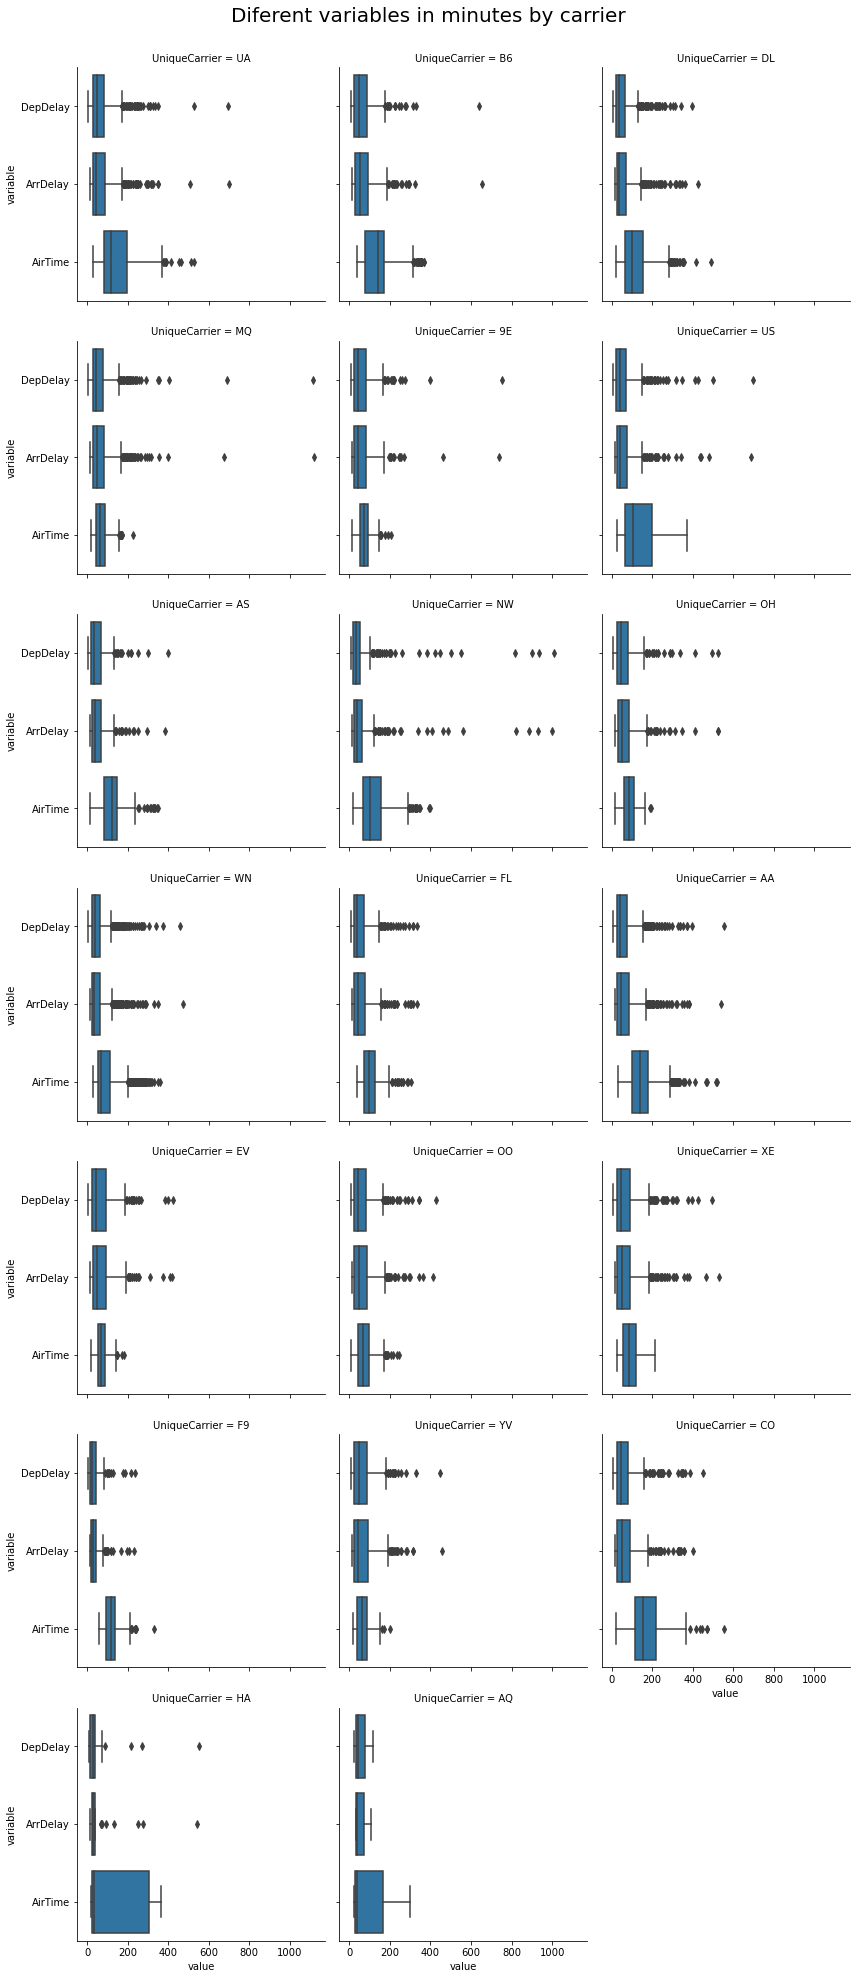

In [94]:
g = sns.FacetGrid(pd.melt(new_df_r2, id_vars='UniqueCarrier'), col='UniqueCarrier', height=4, col_wrap=3)
g.map(sns.boxplot, 'value', 'variable')
g.tight_layout()
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Diferent variables in minutes by carrier',fontsize=20)
plt.savefig("fig 21 Facet Grid plotbox by carrier.png")
plt.show()


'WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'DL: Delta Airlines', 'XE: ExpressJet', 'CO: Continental Airlines', 'US: US Airways', 'EV: Atlantic Southeast Airlines', 'NW: Northwest Airlines', 'FL: AirTran Airways', 'YV: Mesa Airlines', 'B6: JetBlue Airways', 'OH: Comair', '9E: Pinnacle Airlines', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines', 'AQ: Aloha Airlines'

With this plot we can obtain the statistics of the three variables for each carrier.

### Facet Grid scatterplot

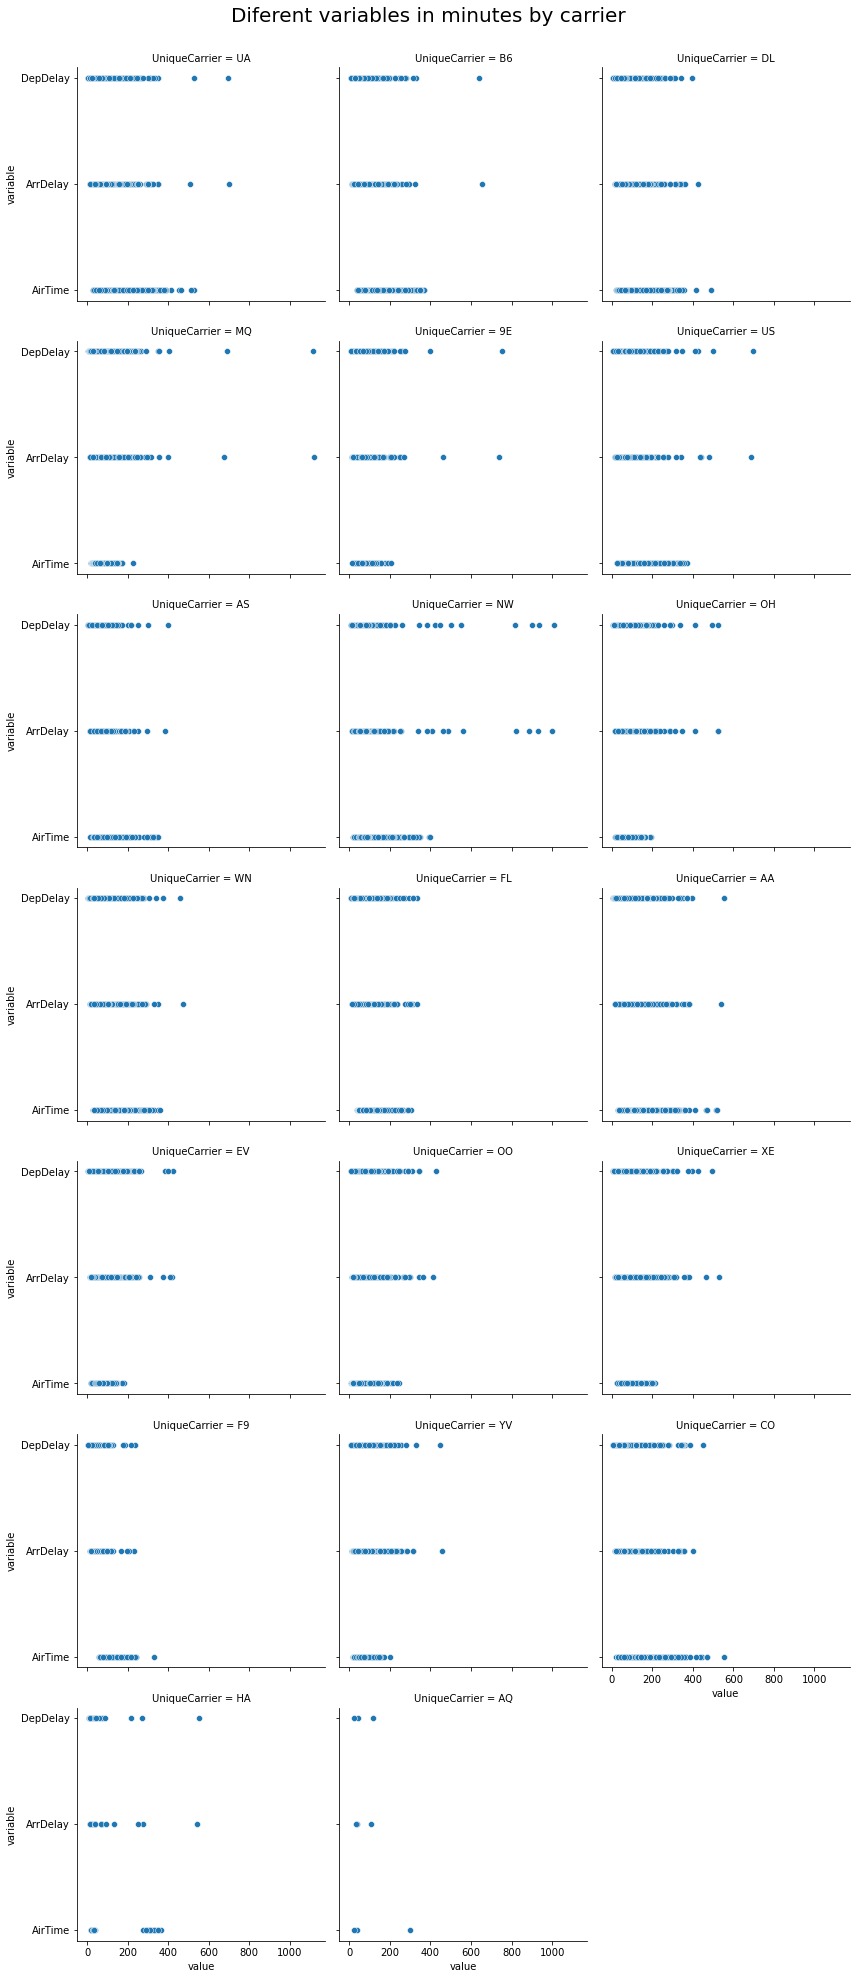

In [95]:
g = sns.FacetGrid(pd.melt(new_df_r2, id_vars='UniqueCarrier'), col='UniqueCarrier', height=4, col_wrap=3)
g.map(sns.scatterplot, 'value', 'variable')

g.tight_layout()
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Diferent variables in minutes by carrier',fontsize=20)
plt.savefig("fig 22 Facet Grid scatterplot by carrier.png")
plt.show()


It offers less information but we can see clearly the distribution and outliers.

## Exercise 2 Export graphics as images or html


I added plt.savefig to all the graphics and I have got all of them.

## Exercise 3 Integrate all the the graphics in exercise 5, Sprint 3. 


In exercise 5 I included others graphics and tables. The graphics in the present exercise are different from the ones in exercise 5. To integrate all the graphics will be very time consuming and, in my opinion, adds almost nothing to my learning. For this reason, I ask to be exonerated of this exercise and go on with my lerning of other exercises.